In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, spearmanr
from utils import barh_plot, corr_heatmap, dist_manh_plot

from sklearn.metrics.pairwise import pairwise_distances_argmin

# Загрузка данных

In [2]:
data = pd.read_csv('NY Realstate Pricing.csv')
data = data.drop(columns=['F1', 'id'])
data.head()

neighbourhood  latitude  longitude        room_type  price  \
0             Midtown  40.75362  -73.98377  Entire home/apt    225   
1            Brooklyn  40.68514  -73.95976  Entire home/apt     89   
2           Manhattan  40.74767  -73.97500  Entire home/apt    200   
3  Bedford-Stuyvesant  40.68688  -73.95596     Private room     60   
4           Manhattan  40.76489  -73.98493     Private room     79   

   days_occupied_in_2019  minimum_nights  number_of_reviews  \
0                     15              10                 48   
1                    188               1                295   
2                    362               3                 78   
3                      0              29                 49   
4                    141               2                454   

   reviews_per_month  availability_2020  
0               0.39                  1  
1               4.67                  1  
2               0.60                 19  
3               0.38                365  
4               3.52                242

In [3]:
universities = pd.read_csv('universities.csv', index_col=0)
universities

Latitude  Longitude
University                                                              
Cornell University                                  42.448500 -76.478600
Columbia University                                 40.807384 -73.963036
New York University                                 40.724700 -73.990300
University of Rochester                             43.128330 -77.628326
Syracuse University                                 43.037700 -76.134000
University at Buffalo; State University of New ...  42.992830 -78.773990
Rochester Institute of Technology                   43.084300 -77.674470
Fordham University                                  40.856500 -73.884610
Rensselaer Polytechnic Institute                    42.730000 -73.677500
Stony Brook University                              40.914225 -73.116086

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neighbourhood          17614 non-null  object 
 1   latitude               17614 non-null  float64
 2   longitude              17614 non-null  float64
 3   room_type              17614 non-null  object 
 4   price                  17614 non-null  int64  
 5   days_occupied_in_2019  17614 non-null  int64  
 6   minimum_nights         17614 non-null  int64  
 7   number_of_reviews      17614 non-null  int64  
 8   reviews_per_month      17614 non-null  float64
 9   availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.3+ MB


# Обработка данных

Удаилили объявления с ценами <= 10

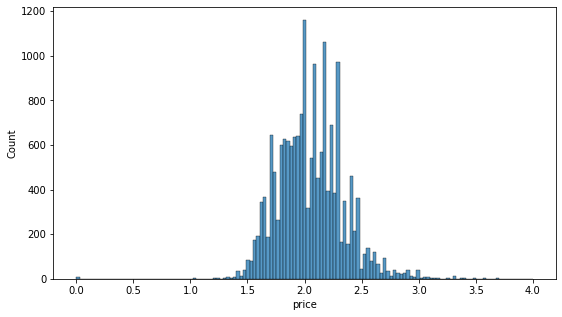

In [5]:
_, ax = plt.subplots(figsize=(9, 5))
sns.histplot(np.log10(data['price']+1));

In [4]:
data = data[data['price'] > 10]
data = data[data['price'] <= 2000]

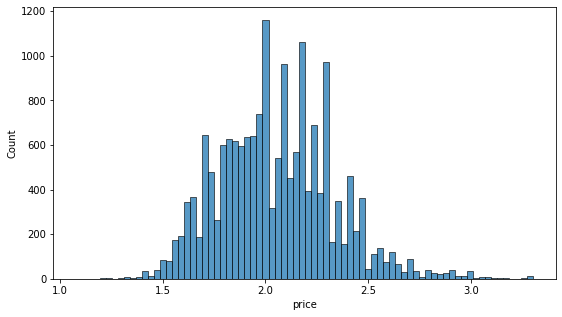

In [7]:
_, ax = plt.subplots(figsize=(9, 5))
sns.histplot(np.log10(data['price']+1));

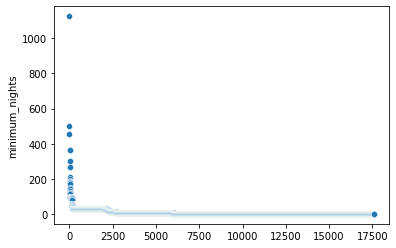

In [8]:
sns.scatterplot(y=data['minimum_nights'].sort_values(ascending=False), x=range(len(data)));


In [5]:
data = data[data['minimum_nights'] <= 366]

# Описание перменных

## neighbourhood

In [294]:
data['neighbourhood'].nunique()

186

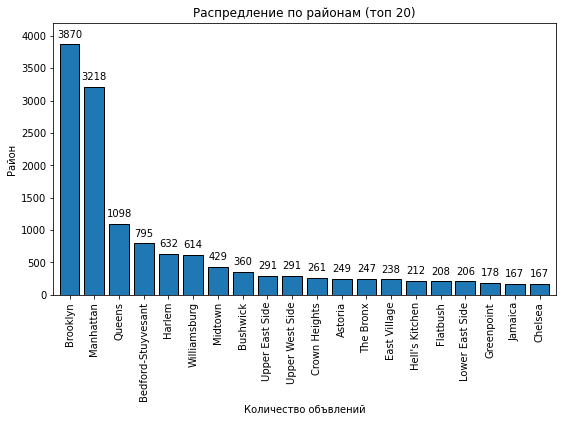

In [340]:
barh_plot(
    data['neighbourhood'].value_counts()[:20],
    (0, 4200),
    'Распредление по районам (топ 20)',
    'Количество объвлений',
    'Район'
)

## room_type

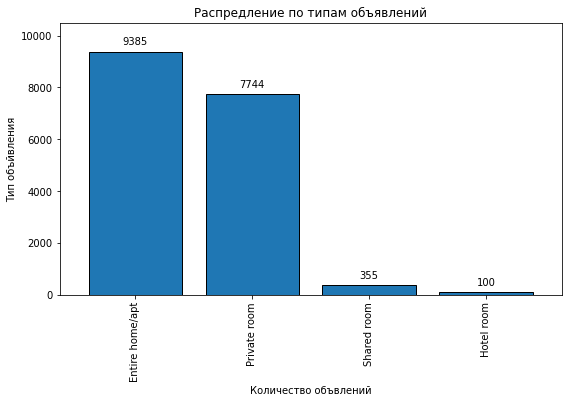

In [339]:
barh_plot(
    data['room_type'].value_counts(),
    (0, 10500),
    'Распредление по типам объявлений',
    'Количество объвлений',
    'Тип объйвления'
)

## Числовые переменные

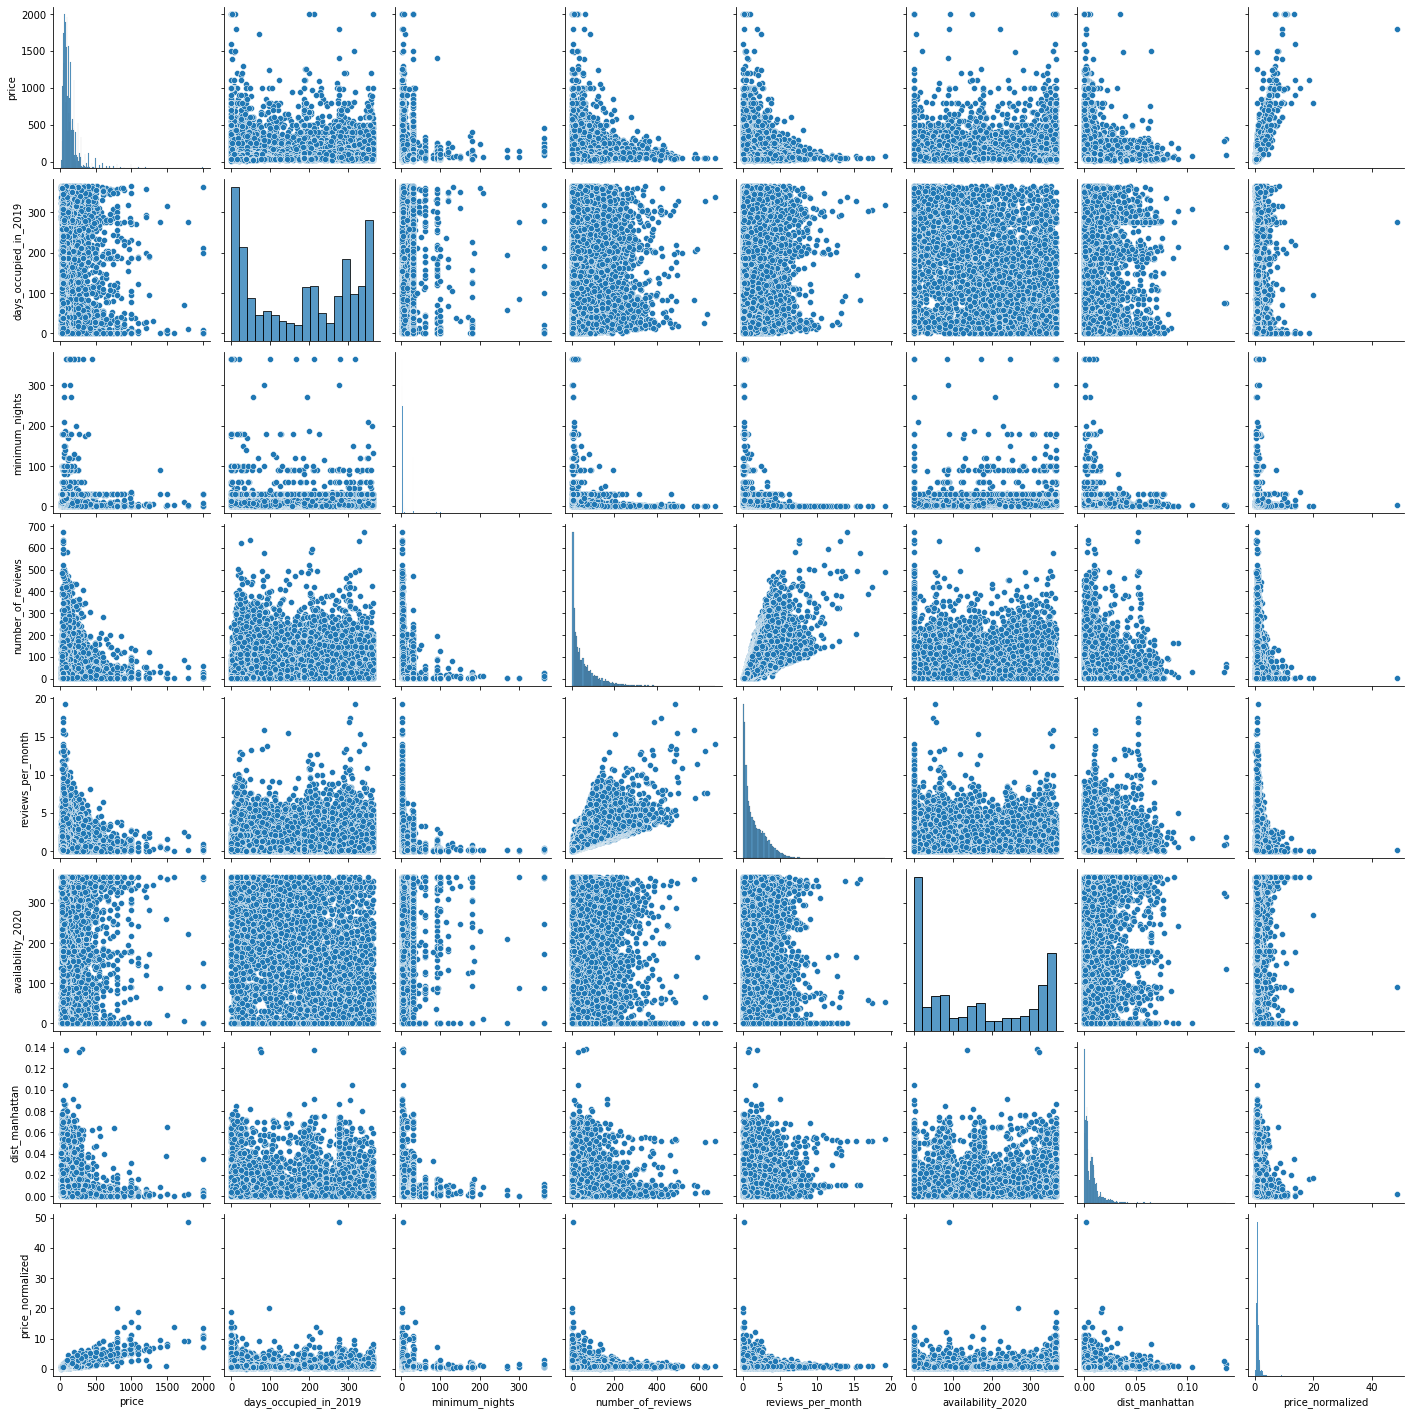

In [297]:
sns.pairplot(data.iloc[:, 4:]);

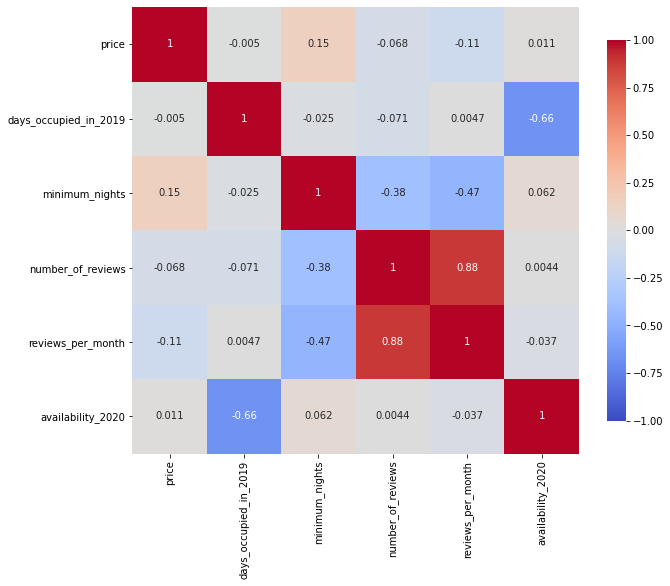

In [355]:
corr_heatmap(data.iloc[:, 4:].corr('spearman'))

In [299]:
data.describe()

latitude     longitude         price  days_occupied_in_2019  \
count  17584.000000  17584.000000  17584.000000           17584.000000   
mean      40.726757    -73.947715    141.895473             179.591219   
std        0.057002      0.050225    131.876317             130.206750   
min       40.508680    -74.239860     11.000000               0.000000   
25%       40.686030    -73.980910     70.000000              35.000000   
50%       40.720540    -73.953040    108.500000             198.000000   
75%       40.763130    -73.930653    170.000000             301.000000   
max       40.908040    -73.721790   2000.000000             364.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    17584.000000       17584.000000       17584.000000   
mean         7.267288          56.175785           1.607880   
std         16.539677          65.997188           1.635413   
min          1.000000           1.000000           0.010000   
25%          2.000000           9.750000           0.340000   
50%          3.000000          33.000000           1.060000   
75%          5.000000          79.000000           2.460000   
max        365.000000         675.000000          19.250000   

       availability_2020  dist_manhattan  price_normalized  
count       17584.000000    17584.000000      17584.000000  
mean          154.073021        0.008074          1.174303  
std           138.059981        0.010637          0.896808  
min             0.000000        0.000008          0.087302  
25%             8.000000        0.001918          0.789114  
50%           125.000000        0.004609          1.000000  
75%           309.000000        0.009574          1.293103  
max           365.000000        0.138247         48.648649

# Поиск зависимостей




## days_occupied_in_2019 против 1/availability_2020

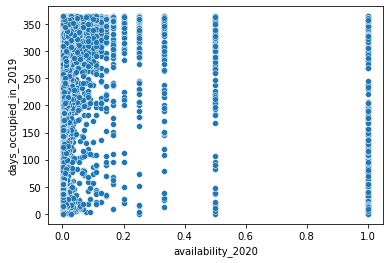

In [300]:
sns.scatterplot(y=data['days_occupied_in_2019'], x=1/(data['availability_2020']))
plt.show()


## price против days_occupied_in_2019

Цена рассматривалась в логарифмической шкале

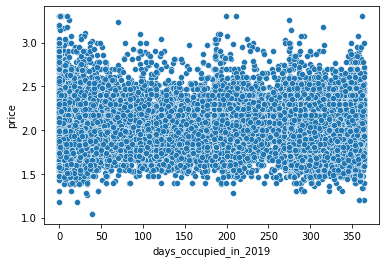

In [301]:
sns.scatterplot(y=np.log10(data['price']), x=data['days_occupied_in_2019']);

## Цена в зависсимости от типа объявления

In [302]:
(
    data
    .assign(price_log10 = np.log10(data['price']))
    .groupby('room_type')
    ['price_log10']
    .describe()
)

count      mean       std       min       25%       50%  \
room_type                                                                   
Entire home/apt  9385.0  2.215727  0.225952  1.041393  2.075547  2.184691   
Hotel room        100.0  2.156398  0.302785  1.544068  2.075547  2.176091   
Private room     7744.0  1.860773  0.202080  1.301030  1.716003  1.845098   
Shared room       355.0  1.695643  0.273818  1.176091  1.531479  1.653213   

                      75%       max  
room_type                            
Entire home/apt  2.332438  3.301030  
Hotel room       2.298853  3.095169  
Private room     1.977724  3.203848  
Shared room      1.812913  3.255273

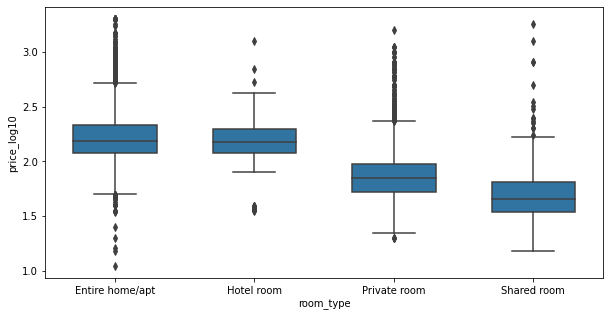

In [303]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data.assign(price_log10 = np.log10(data['price'])),
    y='price_log10',
    x='room_type',
    color='C0',
    order=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
    width=0.6
);

In [304]:
samples = [sub_df['price'].values for _, sub_df in data.groupby('room_type')]
kw_test = kruskal(*samples)
print('Kruskal Wallis test p-value:', kw_test.pvalue)

Kruskal Wallis test p-value: 0.0


Отвергаем нулевую гипотезу, что между типами объявлений нет разницы в цене

In [6]:
enitire_apt = data['room_type'].eq('Entire home/apt')
hotel_room = data['room_type'].eq('Hotel room')
shared_room = data['room_type'].eq('Shared room')
private_room = data['room_type'].eq('Private room')